In [2]:
import pandas as pd
import numpy as np
import time
import scipy.signal
import matplotlib.pyplot as plt
import Levenshtein as L
import catch22
import os
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

#reading in data from Spiker Box
file1 = pd.read_csv('Spikerbox/Week_8/LRflutterx4_h2.txt', sep = ' ', header=None) 
file2 = pd.read_csv('Spikerbox/Week_10/LRflutter_a2.txt', sep = ' ', header=None) 
file3 = pd.read_csv('Spikerbox/Week_10/LRflutter_h1.txt', sep = ' ', header=None) 
file4 = pd.read_csv('Spikerbox/Week_10/LRflutter_s4.txt', sep = ' ', header=None) 
file5 = pd.read_csv('Spikerbox/Week_10/LRflutter_s5.txt', sep = ' ', header=None) 
file6 = pd.read_csv('Spikerbox/Week_10/LRflutter_s6.txt', sep = ' ', header=None) 
file7 = pd.read_csv('Spikerbox/Week_12/LLRRflfl_h1.txt') 
file8 = pd.read_csv('Spikerbox/Week_12/LLRRflfl_h3_charging.txt') 
file9 = pd.read_csv('Spikerbox/Week_12/LLRRflfl_n1.txt') 
file10 = pd.read_csv('Spikerbox/Week_12/LLRRflfl_s1.txt') 


x = 200 #number of points we average over

# Filtering the data 
data1 = file1.iloc[:,1]
data1 = data1.to_numpy()
data1 = np.flip(data1)
a1 = []
i = 0
while i <len(data1):     
    a1.append(np.mean(data1[i:i+x]))
    i += x

data2 = file2.iloc[:,0]
data2 = data2.to_numpy()
data2 = np.flip(data2)
a2 = []
i = 0
while i <len(data2):     
    a2.append(np.mean(data2[i:i+x]))
    i += x

data3 = file3.iloc[:,0]
data3 = data3.to_numpy()
data3 = np.flip(data3)
a3 = []
i = 0
while i <len(data3):     
    a3.append(np.mean(data3[i:i+x]))
    i += x

data4 = file4.iloc[:,0] 
data4 = data4.to_numpy()
data4 = np.flip(data4)
a4 = []
i = 0
while i <len(data4):     
    a4.append(np.mean(data4[i:i+x]))
    i += x

data5 = file5.iloc[:,0] 
data5 = data5.to_numpy()
data5 = np.flip(data5)
a5 = []
i = 0
while i <len(data5):     
    a5.append(np.mean(data5[i:i+x]))
    i += x

data6 = file6.iloc[:,0]
data6 = data6.to_numpy()
data6 = np.flip(data6)
a6 = []
i = 0
while i <len(data6):     
    a6.append(np.mean(data6[i:i+x]))
    i += x
a6 = a6[1100:]

data7 = file7.iloc[:,0]
data7 = data7.to_numpy()
data7 = np.flip(data7)
a7 = []
i = 0
while i <len(data7):     
    a7.append(np.mean(data7[i:i+x]))
    i += x
a7 = a7[350:]

data8 = file8.iloc[:,0]
data8 = data8.to_numpy()
data8 = np.flip(data8)
a8 = []
i = 0
while i <len(data8):     
    a8.append(np.mean(data8[i:i+x]))
    i += x
a8 = a8[1500:]

data9 = file9.iloc[:,0]
data9 = data9.to_numpy()
data9 = np.flip(data9)
a9 = []
i = 0
while i <len(data9):     
    a9.append(np.mean(data9[i:i+x]))
    i += x
a9 = a9[900:]

data10 = file10.iloc[:,0]
data10 = data10.to_numpy()
data10 = np.flip(data10)
a10 = []
i = 0
while i <len(data10):     
    a10.append(np.mean(data10[i:i+x]))
    i += x
a10 = a10[250:] 

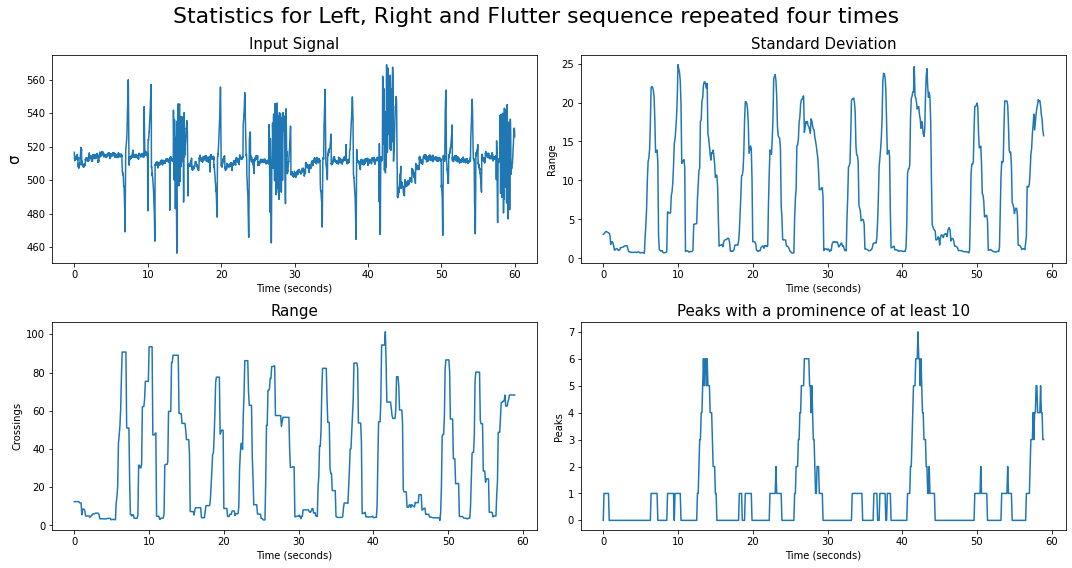

In [3]:
# Visualisations of statistics for the file a1

time2 = np.arange(0, 60, 0.02)
sd = [] # Initialise standard deviation list
dif = [] # Initialise range list 
peaks1 = [] # Initialise peaks list 
x = 0
time = []
last_seq = np.empty(0)
l = len(a1) # Length of file 
b = 0
while b < l:
    # Take one second of data
    if l-b < 50:
        data_temp = a1[b:(l-1)]
    else:
        data_temp = a1[b:(b+50)]
    combined = np.concatenate((last_seq, data_temp), axis = None)

    c = 0
    if len(combined) > 0:
        movement = len(combined) - 50 # How much the rolling window can move before reaching end of 2 second sequence
        while movement - c > 0: # Rolling window through the combined 2 seconds of data 
            interval = combined[c:(c+50)] # Current window being evaluated
            sd.append(np.std(interval)) # Standard deviation
            dif.append(np.max(interval) - np.min(interval)) # Range
            peaks1.append(len(scipy.signal.find_peaks(interval, prominence=10)[0])) # Number of peaks 
            time.append(x) 
            x += 0.1
            c += 5 # Moving window by 0.1 seconds 
    last_seq = data_temp # Storing last second of data 
    b += 50 # Look at next 1 second of data

# Plotting statistics 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15, 8)) #figsize=(5, 3)
fig.suptitle('Statistics for Left, Right and Flutter sequence repeated four times', fontsize=22)
axes[0][0].plot(time2, a1)
axes[0][0].set_title('Input Signal', fontsize=15)
axes[0][0].set_xlabel("Time (seconds)")
axes[0][0].set_ylabel('\u03C3', fontsize=15)
axes[0][1].plot(time, sd)
axes[0][1].set_title('Standard Deviation', fontsize=15)
axes[0][1].set(xlabel="Time (seconds)", ylabel='Range')
axes[1][0].plot(time, dif)
axes[1][0].set_title('Range', fontsize=15)
axes[1][0].set(xlabel="Time (seconds)", ylabel='Crossings')
axes[1][1].plot(time, peaks1)
axes[1][1].set_title('Peaks with a prominence of at least 10', fontsize=15)
axes[1][1].set(xlabel="Time (seconds)", ylabel='Peaks')
fig.tight_layout()

In [4]:
# Rules Based eye movement detection
def Detection(seq, std_thresh, diff_thresh, prom_threshold, peaks_thresh):
    # Statistics for sequence
    std = np.std(seq) # Standard Deviation
    diff = np.max(seq) - np.min(seq)
    peaks = len(scipy.signal.find_peaks(seq, prominence=prom_threshold)[0])
    maxval = np.argmax(seq)
    minval = np.argmin(seq)
    if peaks > peaks_thresh:
        return 'F'
    elif std > std_thresh and diff > diff_thresh:
        if maxval > minval:
            return 'L'
        else:
            return 'R'
    else:
        return 'NA'

# Files and their correct sequences of eye movements to be used for the evaluation
files = [[a1, 'LRFLRFLRF'], [a2, 'RLFRLFRLF'], [a7, 'LLRRFFLLRRFFLLRRFFLLR'], [a8, 'LLRRFFLLRRFF']]

In [5]:
# Left eye movements for KNN model 
L1 = a3[345:440]
L2 = a3[1395:1495]
L3 = a4[390:488]
L4 = a4[1302:1397]
L5 = a5[1195:1295]
L6 = a5[295:375]
L7 = a6[145:235]
L8 = a9[840:890]
L9 = a9[950:1000]
L10 = a10[1115:1165]
L11 = a10[1205:1255]

# Right eye movements for KNN model
R1 = a3[655:755]
R2 = a3[1665:1755]
R3 = a4[647:743]
R4 = a4[1555:1655]
R5 = a5[545:655]
R6 = a5[1447:1540]
R7 = a6[400:500]
R8 = a9[590:640]
R9 = a9[770:810]
R10 = a10[840:890]
R11 = a10[930:980]

# Flutter eye movments for KNN model
F1 = a3[1900:1970]
F2 = a3[2750:2810]
F3 = a4[950:1020]
F4 = a4[2750:2800]
F5 = a5[900:1000]
F6 = a5[1760:1810]
F7 = a6[700:770]
F8 = a9[1075:1125]
F9 = a9[1205:1255]
F10 = a10[1350:1400]
F11 = a10[1550:1600]

# Extracting the catch22 features for the training data
m1L1 = catch22.catch22_all(L1)['values']
m1L2 = catch22.catch22_all(L2)['values']
m1L3 = catch22.catch22_all(L3)['values']
m1L4 = catch22.catch22_all(L4)['values']
m1L5 = catch22.catch22_all(L5)['values']
m1L6 = catch22.catch22_all(L6)['values']
m1L7 = catch22.catch22_all(L7)['values']
m1L8 = catch22.catch22_all(L8)['values']
m1L9 = catch22.catch22_all(L9)['values']
m1L10 = catch22.catch22_all(L10)['values']
m1L11 = catch22.catch22_all(L11)['values']
m1R1 = catch22.catch22_all(R1)['values']
m1R2 = catch22.catch22_all(R2)['values']
m1R3 = catch22.catch22_all(R3)['values']
m1R4 = catch22.catch22_all(R4)['values']
m1R5 = catch22.catch22_all(R5)['values']
m1R6 = catch22.catch22_all(R6)['values']
m1R7 = catch22.catch22_all(R7)['values']
m1R8 = catch22.catch22_all(R8)['values']
m1R9 = catch22.catch22_all(R9)['values']
m1R10 = catch22.catch22_all(R10)['values']
m1R11 = catch22.catch22_all(R11)['values']
m1F1 = catch22.catch22_all(F1)['values']
m1F2 = catch22.catch22_all(F2)['values']
m1F3 = catch22.catch22_all(F3)['values']
m1F4 = catch22.catch22_all(F4)['values']
m1F5 = catch22.catch22_all(F5)['values']
m1F6 = catch22.catch22_all(F6)['values']
m1F7 = catch22.catch22_all(F7)['values']
m1F8 = catch22.catch22_all(F8)['values']
m1F9 = catch22.catch22_all(F9)['values']
m1F10 = catch22.catch22_all(F10)['values']
m1F11 = catch22.catch22_all(F11)['values']

# KNN model to predict Left, Right and Flutter eye movements
X = np.array([m1L1, m1L2, m1L3, m1L4, m1L5, m1L6, m1L7, m1L8, m1L9, m1L10, m1L11, m1R1, m1R2, m1R3, m1R4, m1R5, m1R6, m1R7, m1R8, m1R9, m1R10, m1R11, m1F1, m1F2, m1F3, m1F4, m1F5, m1F6, m1F7, m1F8, m1F9, m1F10, m1F11])
y = np.array(['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'])

# Scaling the data so that the features have an equal weight in the model
X_scaled = X
scaler = MinMaxScaler()
scaler.fit(X_scaled)
X_scaled = scaler.transform(X_scaled)

# Testing the accuracy 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred) # Predicted sequence
print(y_test) # Actual sequence

# Final KNN model to be used in the classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_scaled, y)


# KNN model to predict Left and Right eye movements
X2 = np.array([m1L1, m1L2, m1L3, m1L4, m1L5, m1L6, m1L7, m1L8, m1L9, m1L10, m1L11, m1R1, m1R2, m1R3, m1R4, m1R5, m1R6, m1R7, m1R8, m1R9, m1R10, m1R11])
y2 = np.array(['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'])

# Scaling the data so that the features have an equal weight in the model
X2_scaled = X2
scaler = MinMaxScaler()
scaler.fit(X2_scaled)
X2_scaled = scaler.transform(X2_scaled)

# Testing the accuracy
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.3)
classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(X2_train, y2_train)
y2_pred = classifier2.predict(X2_test)
print(y2_pred) # Pedicated sequence
print(y2_test) # Actual sequence

# Final KNN model to be used in the classifier 
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X2_scaled, y2)

['L' 'L' 'F' 'R' 'L' 'L' 'F' 'F' 'R' 'L']
['L' 'R' 'F' 'R' 'L' 'L' 'F' 'F' 'R' 'L']
['L' 'L' 'L' 'R' 'R' 'L' 'L']
['L' 'L' 'R' 'R' 'R' 'L' 'L']


KNeighborsClassifier()

In [6]:
# Window lengths used for the rolling window
window_lengths = [0.6, 0.8, 1, 1.2, 1.4, 1.6] 

# Initialise lists which contain accuracy for each window length
final_accuracy1 = []
final_accuracy2 = []

# Compute accuracies for Rule Based Classifier and Combined KNN and Rule Based classifier
for window_length in window_lengths: # Looping through each window length 
    window_size = int(window_length * 50)
    tot_dist = 0 # Total Levenshtein Distance to be used for accuracy calculation
    num_movements = 0 # Number of movements to be used for accuracy calculation
    tot_dist2 = 0
    num_movements2 = 0
    if window_size < 1: # Smaller window sizes don't capture as many peaks so they need a smaller peak threshold
        peak_thresh = 1
    else:
        peak_thresh = 2 

    for file in files: #Looping through each file
        l = len(file[0]) # Length of file
        data = file[0]
        b = 0 # Variable that indicates what part we are looking at in the file
        calibrating = True
        start = True
        last_seq = np.empty(0) # Initialse array to store the previous second of data
        count = 0 # Number of intervals inbetween eye movements (used to distinguish between eye movements)
        ccount = 0 # Same as count but for calibration stage 
        best_diff = 0 # Storing the largest range during an eye movement for classification purposes
        cbest_diff = 0 # Same as best_diff but for calibration stage
        cstds = np.empty(0) # Initialse array to standard deviations from calibration stage
        cdiffs = np.empty(0) # Initialse array to ranges from calibration stage
        final = [] # Accuracies for each file
        final2 = []

        while b < l: 
            # Collecting 1 second of data
            if l-b < window_size:
                data_temp = data[b:(b-1)]
            else:
                data_temp = data[b:(b+window_size)]

            data_temp = np.array(data_temp)
            # Combining the previous and current second of data to loop through
            combined = np.concatenate((last_seq, data_temp), axis = None) 
            
            # Calibration Stage
            if calibrating and b > 0: # b > 0 makes sure we don't look at first second of data as it tends to be messy
                if start:
                    arrs = np.split(data_temp, 5)
                    base_std = np.std(data_temp)
                    if base_std > 5:
                        base_std = 5
                    start = False
                else:
                    c = 0
                    movement = len(combined) - window_size # How much the rolling window can move before reaching end of 2 second sequence
                    while movement - c > 0: # Rolling window through the combined 2 seconds of data
                        interval = combined[c:(c+window_size)] # Current interval being evaluated 
                        
                        # Statistics for interval 
                        cstd = np.std(interval) # Standard Deviation
                        cdiff = np.max(interval) - np.min(interval) # Range
                        cpeaks = len(scipy.signal.find_peaks(interval, prominence=10)[0]) # Peaks
                        
                        if cpeaks > peak_thresh: # Signals the end of the calibration stage 
                            calibrating = False
                            cpeaks = 0
                            cstds = np.flip(np.sort(cstds)) # Rank standard deviations for each eye movement
                            cdiffs = np.flip(np.sort(cdiffs)) # Range each range for the eye movements
                            
                            # Determining the standard deviation threshold 
                            max_std = cstds[0]
                            if len(cstds) > 3:
                                low_std = cstds[2]
                            elif len(cstds) == 1:
                                low_std = max_std
                            else:
                                low_std = cstds[1]
                            std_threshold = low_std/2 # Standard deviation threshold
                            
                            # Determining the range threshold
                            max_diff = cdiffs[0]
                            if len(cdiffs) > 3:
                                low_diff = cdiffs[2]
                            elif len(cdiffs) == 1:
                                low_diff = max_diff
                            else:
                                low_diff = cdiffs[1]
                            diff_threshold = low_diff/2 # Range threshold

                            prom_threshold = 10
                            break  # Leave calibration stage

                        elif cstd > 2*base_std and ccount > 4:
                            # Finding the interval from an eye movement which contains the largest range
                            if cdiff >= cbest_diff:
                                cbest_diff = cdiff
                                cbest = interval
                            elif (cbest_diff - cdiff) > 10:
                                cstds = np.append(cstds, np.std(cbest)) 
                                cdiffs = np.append(cdiffs, cbest_diff)
                                cbest = 0
                                cbest_diff = 0
                                ccount = 0
                        else:
                            ccount += 1

                        c += 5 # Moving the window 0.1 seconds 

            elif b > 0:
                d = 0
                if len(combined) > window_size:
                    movement = len(combined) - window_size # How much the rolling window can move before reaching end of 2 second sequence
                    while movement - d > 0: # Rolling window through the combined 2 seconds of data
                        interval = combined[d:(d+window_size)] # Current interval being evaluated 
                        predicted = Detection(interval, std_threshold, diff_threshold, prom_threshold, peak_thresh) # Predicted eye movement from Rules-Based Classifier
                        ran = np.max(interval) - np.min(interval) # Range 
                        sdi = np.std(interval) # Standard Devaition 
                        
                        # Counting number of NA's inbetween eye movements to separate them 
                        if predicted == 'NA':
                            count += 1
                            
                        # Flutter detected
                        elif predicted == 'F' and count >= 5:
                            count = 0
                            best = 0
                            best_diff = 0
                            final.append(predicted)
                            final2.append(predicted)
                        
                        # Detection of an eye movement occurring due to significant standard deviation and range
                        elif (sdi > std_threshold or ran > diff_threshold) and count >= 5:
                            # Finding the interval from an eye movement which contains the largest range
                            if ran >= best_diff:
                                best_diff = ran
                                best = interval # Store interval with largest range
                            elif (best_diff - ran) > 10:
                                actual = Detection(best, std_threshold, diff_threshold, prom_threshold, peak_thresh)
                                final.append(actual) # Final detection used for accuracy
                                
                                # KNN eye movement prediction
                                interval_features2 = catch22.catch22_all(best)['values'] # catch22 features from interval
                                full2 = np.vstack((X2, [interval_features2]))
                                # Scaling variables
                                scaler = MinMaxScaler()
                                scaler.fit(full2)
                                full2 = scaler.transform(full2)
                                actual2 = model2.predict([full2[-1]])[0] # Predicted eye movement 
                                
                                final2.append(actual2) # Final detection used for accuracy 
                                
                                best = 0
                                best_diff = 0
                                count = 0
                        d += 5 # Moving the window 0.1 seconds 
            last_seq = data_temp
            b += window_size
        result = ''.join(final) # Final sequence of eye movments for Rules Based classifier 
        accuracy = L.distance(result, file[1]) # Levenshtein Distance
        num_movements += len(file[1])
        tot_dist += accuracy
        
        result2 = ''.join(final2) # Final sequence of eye movements for combined KNN and Rules Based classifier 
        accuracy2 = L.distance(result2, file[1]) # Levenshtein Distance
        num_movements2 += len(file[1])
        tot_dist2 += accuracy2
        
    final_accuracy1.append(1-tot_dist/num_movements) # Append final accuracy for current window size
    final_accuracy2.append(1-tot_dist2/num_movements2) # Append final accuracy for current window size

[0.4901960784313726, 0.7058823529411764, 0.7647058823529411, 0.6862745098039216, 0.7058823529411764, 0.7058823529411764]
[0.43137254901960786, 0.5098039215686274, 0.6274509803921569, 0.4901960784313726, 0.43137254901960786, 0.4901960784313726]
[0.5098039215686274, 0.7647058823529411, 0.7058823529411764, 0.6862745098039216, 0.6274509803921569, 0.607843137254902]



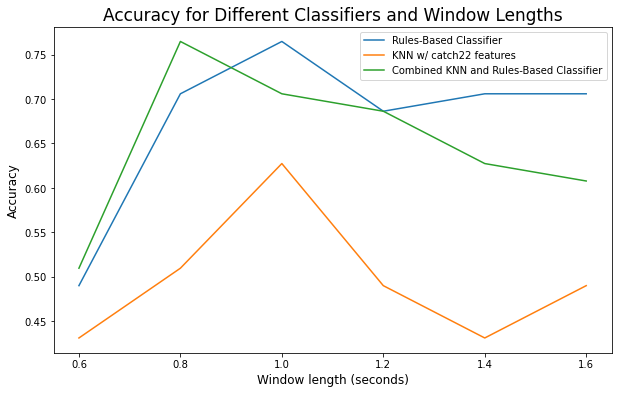

In [7]:
# Initialise list to contain accuracies for each window length 
final_accuracy3 = []

# Combpute accuracy for KNN Classifier
for window_length in window_lengths: # Looping through each window length 
    window_size = int(window_length * 50)
    tot_dist = 0 # Total Levenshtein Distance to be used for accuracy calculation
    num_movements = 0 # Number of movements to be used for accuracy calculation
    if window_size < 1: # Smaller window sizes don't capture as many peaks so they need a smaller peak threshold
        peak_thresh = 1
    else:
        peak_thresh = 2

    for file in files:
        l = len(file[0]) # Length of file
        data = file[0]
        b = 0 # Variable that indicates what part we are looking at in the file
        calibrating = True
        start = True
        last_seq = np.empty(0) # Initialise array to store previoous second of data
        count = 0 # Number of intervals between eye movements
        ccount = 0 # Same as count but for calibration stage
        count2 = 0
        best_diff = 0 # Storing the largest range during an eye movement for classification purposes
        cbest_diff = 0 # Same as best_diff but for calibration stage
        cstds = np.empty(0) # Initialse array to standard deviations from calibration stage
        cdiffs = np.empty(0) # Initialse array to ranges from calibration stage
        final = [] # Accuracies for ach file

        while b < l:
            # Collecting 1 second of data
            if l-b < window_size:
                data_temp = data[b:(b-1)]
            else:
                data_temp = data[b:(b+window_size)]

            data_temp = np.array(data_temp)
            # Combining the previous and current second of data to loop through
            combined = np.concatenate((last_seq, data_temp), axis = None)
            # Calibration stage 
            if calibrating and b > 0:
                if start: 
                    arrs = np.split(data_temp, 5)
                    base_std = np.std(data_temp)
                    if base_std > 5:
                        base_std = 5
                    start = False
                else:
                    c = 0
                    movement = len(combined) - window_size # How much the rolling window can move before reaching end of 2 second sequence
                    while movement - c > 0: # Rolling window through the combined 2 seconds of data 
                        interval = combined[c:(c+window_size)] # Current interval being evaluated
                        
                        # Statistics for interval
                        cstd = np.std(interval) # Standard Deviation
                        cdiff = np.max(interval) - np.min(interval) # Range
                        cpeaks = len(scipy.signal.find_peaks(interval, prominence=10)[0]) # Peaks
                        
                        if cpeaks > peak_thresh: # Signals the end of the calibration stage
                            calibrating = False
                            cpeaks = 0
                            cstds = np.flip(np.sort(cstds)) # Range standard deviations for eye movements
                            cdiffs = np.flip(np.sort(cdiffs)) # Rank the ranges for eye movements
                            
                            # Determining the standard devaition threshold
                            max_std = cstds[0]
                            if len(cstds) > 3:
                                low_std = cstds[2]
                            elif len(cstds) == 1:
                                low_std = max_std
                            else:
                                low_std = cstds[1]
                            std_threshold = low_std/1.5 # Standard Deviation threshold
                            
                            # Determining the range threshold 
                            max_diff = cdiffs[0]
                            if len(cdiffs) > 3:
                                low_diff = cdiffs[2]
                            elif len(cdiffs) == 1:
                                low_diff = max_diff
                            else:
                                low_diff = cdiffs[1]
                            diff_threshold = low_diff/1.5 # Range threshold 

                            prom_threshold = 10
                            break # Leave calibration stage 

                        elif cstd > 2*base_std and ccount > 4:
                            # Finding the interval from an eye movement which contains the largest range
                            if cdiff >= cbest_diff:
                                cbest_diff = cdiff
                                cbest = interval
                            elif (cbest_diff - cdiff) > 10:
                                cstds = np.append(cstds, np.std(cbest)) 
                                cdiffs = np.append(cdiffs, cbest_diff)
                                cbest = 0
                                cbest_diff = 0
                                ccount = 0
                        else:
                            ccount += 1

                        c += 5
                    
            # After calibration stage is finished 
            elif b > 0:
                d = 0 
                if len(combined) > window_size:
                    movement = len(combined) - window_size # How much the rolling window can move before reaching end of 2 second sequence
                    while movement - d > 0: # Rolling window through the combined 2 seconds of data
                        interval = combined[d:(d+window_size)]
                        ran = np.max(interval) - np.min(interval) # Range
                        sdi = np.std(interval) # Standard devation
                        
                        # KNN eye movement prediction
                        interval_features = catch22.catch22_all(interval)['values'] # catch22 features
                        full = np.vstack((X, [interval_features]))
                        # Scaling variables
                        scaler = MinMaxScaler()
                        scaler.fit(full)
                        full = scaler.transform(full)
                        actual = model.predict([full[-1]])[0] # Predicted eye movement
                        
                        # Detection of an eye movement occurring due to significant standard deeviation and range 
                        if (sdi > std_threshold or ran > diff_threshold) and count >= 10:
                            count2 += 1
                            if count2 >= 12: # Gets a prediction from roughly the middle of an eye movement 
                                final.append(actual) # Final detection used for accuracy
                                best = 0
                                best_diff = 0
                                count = 0
                                count2 = 0
                        
                        else: # counting number of times when no eye movements are occurring inbetween eye movements
                            count += 1
                            
                        d += 5 # Moving the window by 0.1 seconds 
            last_seq = data_temp # Recording the last second of data 
            b += window_size
        result = ''.join(final) # Final sequence of eye movements for KNN classifier
        accuracy = L.distance(result, file[1]) # Levenshtein distance    
        num_movements += len(file[1])
        tot_dist += accuracy

    final_accuracy3.append(1-tot_dist/num_movements) # Append final accuracy for current window size

print(final_accuracy1)
print(final_accuracy3)
print(final_accuracy2)
print()

# Plotting the different accuries for different classifiers and window lengths 
plt.figure(figsize=(10,6))
plt.plot(window_lengths,final_accuracy1, label='Rules-Based Classifier')
plt.plot(window_lengths,final_accuracy3, label='KNN w/ catch22 features')
plt.plot(window_lengths,final_accuracy2, label='Combined KNN and Rules-Based Classifier')
plt.title("Accuracy for Different Classifiers and Window Lengths", fontsize=17)
plt.xlabel("Window length (seconds)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()